In [1]:
import sys
import random
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler

cmap = 'Blues'
warnings.filterwarnings('ignore')
sys.path.insert(0, '../GRAPH_Framework-main')
from tasks.experiment import ModelTest

## Experiment

### Precision

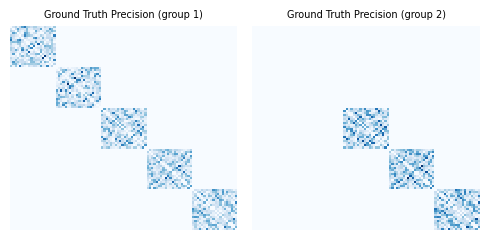

In [2]:
from utils.common import simulation_random_graph
random.seed(1)
np.random.seed(1)

g = 4
n = 100
N_lt = [10*n]*g
D_lt, Sigma = simulation_random_graph(n, N_lt, g=g, prep=5)

Sinv = []
for i in range(len(Sigma)):
    Sinv.append(inv(Sigma[i]))

g = 2
Sinv = [Sinv[0].copy(), Sinv[2].copy()]
D_lt = [D_lt[0].copy(), D_lt[2].copy()]
Sigma = [Sigma[0].copy(), Sigma[2].copy()]
D = np.concatenate(D_lt, axis=0)

fig, axs = plt.subplots(1, g, figsize=(2.5*g, 2.5))
for i in range(g):
    sns.heatmap(np.abs(Sinv[i]-np.diag(np.diag(Sinv[i]))), ax=axs[i], cmap=cmap, cbar=False)
    axs[i].set_title('Ground Truth Precision (group '+str(i+1)+')', fontsize=7)
    axs[i].axis('off')
    
plt.tight_layout()
plt.show()

In [3]:
parameters = {'max_iter':1000, 'outer_max_iter':25, 'lam':0.05, 'lamm':0.05, 'rhom':1, 'tol':1e-5}
precision_test = ModelTest(model_type='Precision',showfig=False)
precision_test.group_graph(D,D_lt,parameters)

Graph Learning
overall global results: 97.17169
disparity error: 7.814884 

Objective Fair Graph Learning
overall global results: 97.44279
disparity error: 0.623717
objective improvement: -0.27110 (-0.27899%)
disparity improvement: 7.191167 (92.01886%)


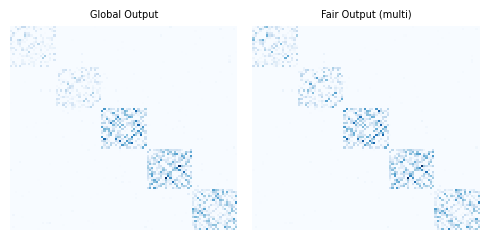

In [4]:
precision_test.runtime(1,D,D_lt,parameters)
precision_test.summary()
precision_test.plot()

### Covariance

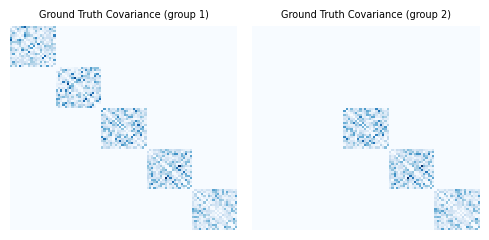

In [5]:
from utils.common import simulation_random_graph
random.seed(1)
np.random.seed(1)

g = 4
n = 100
N_lt = [10*n]*g
D_lt, Sigma = simulation_random_graph(n, N_lt, g=g, prep=5)

g = 2
Sigma = [Sigma[0].copy(), Sigma[2].copy()]
D_lt = [D_lt[0].copy(), D_lt[2].copy()]
D = np.concatenate(D_lt, axis=0)

fig, axs = plt.subplots(1, g, figsize=(2.5*g, 2.5))
for i in range(g):
    sns.heatmap(np.abs(Sigma[i]-np.diag(np.diag(Sigma[i]))), ax=axs[i], cmap=cmap, cbar=False)
    axs[i].set_title('Ground Truth Covariance (group '+str(i+1)+')', fontsize=7)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
parameters = {'max_iter':1000, 'outer_max_iter':25,'tau':0.01, 'lam':0.05, 'lamm':0.05, 'rhom':1, 'tol':1e-5}
covariance_test = ModelTest(model_type='Covariance',showfig=True)
covariance_test.group_graph(D,D_lt,parameters)

Graph Learning
overall global results: 14.31927
disparity error: 5.262695 

Objective Fair Graph Learning
overall global results: 14.48444
disparity error: 0.388927
objective improvement: -0.16517 (-1.15349%)
disparity improvement: 4.873768 (92.60974%)


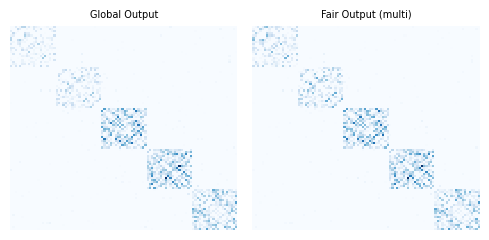

In [7]:
covariance_test.runtime(1,D,D_lt,parameters)
covariance_test.summary()
covariance_test.plot()

### Ising

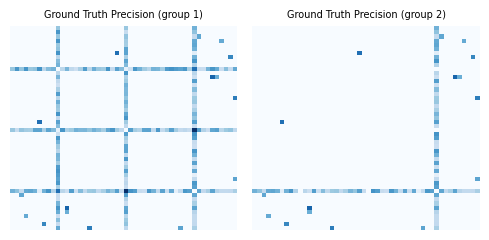

In [8]:
from utils.common import HubNetwork, binary_mcmc
random.seed(23)
np.random.seed(23)

g = 2
n = 50
N_lt = [10*n]*g
N_lt[1] = 20*n

Sinv1 = HubNetwork(n, 0.99, 3, 0.01, "binary",[10,25,40])['Theta']
np.fill_diagonal(Sinv1, 1)
Sinv2 = Sinv1.copy()
Sinv2[10,:] = 0
Sinv2[:,10] = 0
Sinv2[25,:] = 0
Sinv2[:,25] = 0
np.fill_diagonal(Sinv2, np.diag(Sinv1))
Sinv = [Sinv1, Sinv2]

fig, axs = plt.subplots(1, g, figsize=(2.5*g, 2.5))
vmax = 0
for i in range(g):
    vmax = max(vmax, np.max(np.abs(Sinv[i]-np.diag(np.diag(Sinv[i])))))

for i in range(g):
    sns.heatmap(np.abs(Sinv[i]-np.diag(np.diag(Sinv[i]))), ax=axs[i], cmap=cmap, cbar=False, vmin=0, vmax=vmax)
    axs[i].set_title('Ground Truth Precision (group '+str(i+1)+')', fontsize=7)
    axs[i].axis('off')
    
plt.tight_layout()
plt.show()

D1 = binary_mcmc(N_lt[0], Sinv1, 10000, 100, trace=False)
D2 = binary_mcmc(N_lt[1], Sinv2, 10000, 100, trace=False)

D_lt = [D1, D2]
D = np.zeros((N_lt[0]+N_lt[1], n), dtype=np.float64)
D[:N_lt[0],:] = D1
D[N_lt[0]:,:] = D2

In [9]:
parameters = {'max_iter':100, 'outer_max_iter':100, 'step_size':1e-3, 'lam':0.1, 'lamm':0.1, 'rhom':1e5, 'tol':1e-5}
ising_test = ModelTest(model_type='Ising',normalization=False,showfig=True)
ising_test.group_graph(D,D_lt,parameters)

Graph Learning
overall global results: 34.36319
disparity error: 0.000001 

Objective Fair Graph Learning
overall global results: 34.36168
disparity error: 0.000000
objective improvement: 0.00151 (0.00439%)
disparity improvement: 0.000001 (99.99995%)


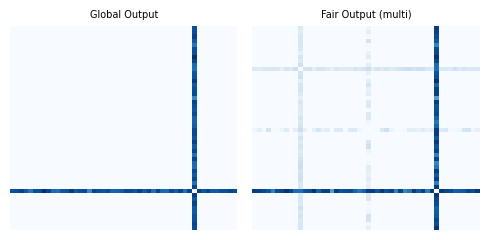

In [10]:
ising_test.runtime(1,D,D_lt,parameters)
ising_test.summary()
ising_test.plot()